In [10]:
#Name - Naman Upadhyaya 
#Roll No. - J066
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

df.columns = ['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ham Messages:
Top 10 words:
u: 979
gt: 318
lt: 316
2: 300
ok: 245
got: 242
ur: 237
know: 236
like: 231
good: 229
Top 10 bi-grams:
lt gt: 276
gon na: 58
let know: 39
sorry later: 38
r u: 37
u r: 37
good morning: 31
wan 2: 31
u wan: 29
wan na: 28
Top 10 tri-grams:
lt decimal gt: 23
u wan 2: 21
gt lt gt: 18
happy new year: 18
lt gt lt: 16
like lt gt: 14
pls send message: 13
pick phone right: 12
phone right pls: 12
right pls send: 12

Spam Messages:
Top 10 words:
free: 219
2: 174
txt: 156
ur: 144
u: 141
mobile: 123
text: 121
4: 120
stop: 114
claim: 113
Top 10 bi-grams:
po box: 24
prize guaranteed: 22
send stop: 19
await collection: 19
urgent mobile: 18
land line: 18
customer service: 17
valid 12hrs: 17
2 claim: 17
contact u: 17
Top 10 tri-grams:
land line claim: 14
draw shows prize: 13
shows prize guaranteed: 13
private 2003 account: 13
2003 account statement: 13
shows 800 points: 12
free entry 2: 11
bonus caller prize: 11
urgent trying contact: 11
camcorder reply 08000930705: 11


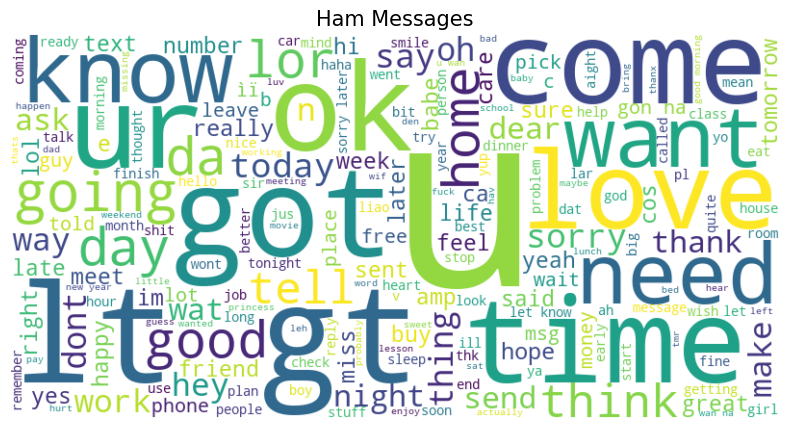

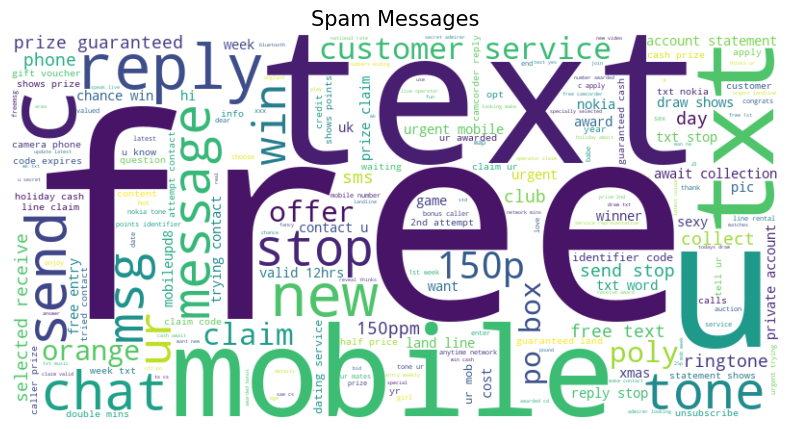

In [11]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english')).union(ENGLISH_STOP_WORDS)

def preprocess_text(text):
    words = word_tokenize(text.lower())
    return [word for word in words if word.isalnum() and word not in stop_words]

df['tokens'] = df['message'].apply(preprocess_text)

ham_messages = df[df['label'] == 'ham']
spam_messages = df[df['label'] == 'spam']

def get_top_ngrams(corpus, n, k):
    ngrams = zip(*[corpus[i:] for i in range(n)])
    ngram_freq = Counter(ngrams)
    return ngram_freq.most_common(k)

def display_top_ngrams(messages, n, title):
    all_words = [word for tokens in messages['tokens'] for word in tokens]
    top_ngrams = get_top_ngrams(all_words, n, 10)
    print(f"Top 10 {title}:")
    for ngram, freq in top_ngrams:
        print(f"{' '.join(ngram)}: {freq}")

print("Ham Messages:")
display_top_ngrams(ham_messages, 1, "words")
display_top_ngrams(ham_messages, 2, "bi-grams")
display_top_ngrams(ham_messages, 3, "tri-grams")

print("\nSpam Messages:")
display_top_ngrams(spam_messages, 1, "words")
display_top_ngrams(spam_messages, 2, "bi-grams")
display_top_ngrams(spam_messages, 3, "tri-grams")

def create_wordcloud(messages, title):
    all_words = ' '.join([' '.join(tokens) for tokens in messages['tokens']])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

create_wordcloud(ham_messages, 'Ham Messages')
create_wordcloud(spam_messages, 'Spam Messages')

In [12]:
df['cleaned_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

y = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)

print(f"F1-score with Bag-of-Words: {f1}")

F1-score with Bag-of-Words: 0.8929889298892989


In [14]:
tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model.fit(X_train_tfidf, y_train_tfidf)

y_pred_tfidf = model.predict(X_test_tfidf)

f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf)

print(f"F1-score with Tf-IDF: {f1_tfidf}")

F1-score with Tf-IDF: 0.7219917012448133


In [15]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text_full(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove email addresses
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

df['preprocessed_text'] = df['message'].apply(preprocess_text_full)

tfidf_vectorizer = TfidfVectorizer()
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(df['preprocessed_text'])

X_train_tfidf_preprocessed, X_test_tfidf_preprocessed, y_train_tfidf_preprocessed, y_test_tfidf_preprocessed = train_test_split(X_tfidf_preprocessed, y, test_size=0.2, random_state=42)

model.fit(X_train_tfidf_preprocessed, y_train_tfidf_preprocessed)

y_pred_tfidf_preprocessed = model.predict(X_test_tfidf_preprocessed)

f1_tfidf_preprocessed = f1_score(y_test_tfidf_preprocessed, y_pred_tfidf_preprocessed)

print(f"F1-score with Tf-IDF and preprocessing: {f1_tfidf_preprocessed}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\naman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


F1-score with Tf-IDF and preprocessing: 0.7679999999999999


In [16]:
print(f"F1-score with Bag-of-Words: {f1}")
print(f"F1-score with Tf-IDF: {f1_tfidf}")
print(f"F1-score with Tf-IDF and preprocessing: {f1_tfidf_preprocessed}")

F1-score with Bag-of-Words: 0.8929889298892989
F1-score with Tf-IDF: 0.7219917012448133
F1-score with Tf-IDF and preprocessing: 0.7679999999999999
